# Prepare datasets

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import ipywidgets as widgets
from IPython.display import Image as IpImage
from IPython.display import display
from ipywidgets import HBox

import loaders as lds

%matplotlib inline

## Constants

In [46]:
data_path = Path("..").joinpath("data_in", "csvs")
images_path = Path("..").joinpath("data_in", "images")
dataset_path = Path("..").joinpath("data_in", "datasets")

data_path.is_dir(), images_path.is_dir(), dataset_path.is_dir()

(True, True, True)

## Load Dataframe

In [41]:
import pandas as pd

df_src = pd.read_csv(str(data_path.joinpath("zooniverse_tpmp_data.csv")))
df_src

experiment                   plant camera view_option  \
0      10ac_mpo1_1904  10ac100_ca_mock_xx_100    msp       sw755   
1      10ac_mpo1_1904  10ac100_ca_mock_xx_100    msp       sw755   
2      10ac_mpo1_1904  10ac100_ca_mock_xx_100    msp       sw755   
3      10ac_mpo1_1904  10ac100_ca_mock_xx_100    msp       sw755   
4      10ac_mpo1_1904  10ac100_ca_mock_xx_100    msp       sw755   
...               ...                     ...    ...         ...   
15849  10ac_mpo1_1904    10ac98_16_mock_xx_98    msp       sw755   
15850  10ac_mpo1_1904    10ac98_16_mock_xx_98    msp       sw755   
15851  10ac_mpo1_1904    10ac98_16_mock_xx_98    msp       sw755   
15852  10ac_mpo1_1904    10ac98_16_mock_xx_98    msp       sw755   
15853  10ac_mpo1_1904    10ac98_16_mock_xx_98    msp       sw755   

                 date_time        date      time  \
0      2019-05-04 05:59:55  2019-05-04  05:59:55   
1      2019-05-05 06:00:37  2019-05-05  06:00:37   
2      2019-05-07 06:00:54  2019-05-07  06:00:54   
3      2019-05-08 12:28:21  2019-05-08  12:28:21   
4      2019-05-08 12:28:21  2019-05-08  12:28:21   
...                    ...         ...       ...   
15849  2019-05-14 11:42:27  2019-05-14  11:42:27   
15850  2019-05-15 05:58:10  2019-05-15  05:58:10   
15851  2019-05-16 05:58:13  2019-05-16  05:58:13   
15852  2019-05-17 05:58:11  2019-05-17  05:58:11   
15853  2019-05-18 05:58:07  2019-05-18  05:58:07   

                               filename            x           y      width  \
0      bBxnW-VJguTHrR1heyox3ydBbfpE.jpg          NaN         NaN        NaN   
1      bpW70Td5eV4xkUIym9XRJnu8Acho.jpg          NaN         NaN        NaN   
2      bPM-aOQctLNKzYGiZ9ZdTBmthavI.jpg   811.757904  774.484711  24.912323   
3      bsZSULAoEEENMYtElvh67OgXeCnw.jpg   678.094482  709.526489  47.968628   
4      bsZSULAoEEENMYtElvh67OgXeCnw.jpg   814.060791  767.004517  42.440308   
...                                 ...          ...         ...        ...   
15849  bTk4nXOeRW4WdfYRscx2yYKZyApA.jpg          NaN         NaN        NaN   
15850   blLmjsjUYVawSvMq8XBs4Kwqab8.jpg  1159.625732  681.139709  31.703491   
15851   bn8VJkrD8MOvOMpmvFNVS04Usr8.jpg  1148.169373  649.089752  50.336182   
15852   b6-esQJlMKhaeTjsHLg9Z4D7qBw.jpg  1136.784790  634.862610  62.473633   
15853  bY1IFGdhgQi6N3oVxHCExvjIxtgs.jpg  1133.616028  621.574371  70.120117   

          height           x1          y1           x2          y2  
0            NaN          NaN         NaN          NaN         NaN  
1            NaN          NaN         NaN          NaN         NaN  
2      27.238861   811.757904  774.484711   836.670227  801.723572  
3      45.099426   678.094482  709.526489   726.063110  754.625916  
4      49.254456   814.060791  767.004517   856.501099  816.258972  
...          ...          ...         ...          ...         ...  
15849        NaN          NaN         NaN          NaN         NaN  
15850  41.302795  1159.625732  681.139709  1191.329224  722.442505  
15851  46.785217  1148.169373  649.089752  1198.505554  695.874969  
15852  66.035828  1136.784790  634.862610  1199.258423  700.898438  
15853  71.230621  1133.616028  621.574371  1203.736145  692.804993  

[15854 rows x 16 columns]

## Split Datasets

In [5]:
len(df_src[["filename"]].filename.unique())

3767

In [6]:
from sklearn.model_selection import train_test_split

train_files, test_files = train_test_split(df_src[["filename"]].drop_duplicates(), test_size=0.2)
test_files, val_files = train_test_split(test_files[["filename"]].drop_duplicates(), test_size=0.5)

len(train_files), len(test_files), len(val_files)

(3013, 377, 377)

In [7]:

train = df_src[df_src.filename.isin(train_files.filename.to_list())].sort_values(["filename"])
test = df_src[df_src.filename.isin(test_files.filename.to_list())].sort_values(["filename"])
val = df_src[df_src.filename.isin(val_files.filename.to_list())].sort_values(["filename"])

len(train), len(test), len(val)


(12755, 1513, 1586)

In [8]:
train

experiment                   plant camera view_option  \
7676  10ac_mpo1_1904  10ac309_ic_mock_xx_309    msp       sw755   
7675  10ac_mpo1_1904  10ac309_ic_mock_xx_309    msp       sw755   
7677  10ac_mpo1_1904  10ac309_ic_mock_xx_309    msp       sw755   
3551  10ac_mpo1_1904  10ac184_hb_mock_xx_184    msp       sw755   
7967  10ac_mpo1_1904  10ac315_bu_mock_xx_315    msp       sw755   
...              ...                     ...    ...         ...   
2501  10ac_mpo1_1904  10ac159_mu_mock_xx_159    msp       sw755   
2500  10ac_mpo1_1904  10ac159_mu_mock_xx_159    msp       sw755   
8751  10ac_mpo1_1904  10ac335_au_mock_xx_335    msp       sw755   
8750  10ac_mpo1_1904  10ac335_au_mock_xx_335    msp       sw755   
7367  10ac_mpo1_1904  10ac299_21_mock_xx_299    msp       sw755   

                date_time        date      time  \
7676  2019-05-12 10:10:09  2019-05-12  10:10:09   
7675  2019-05-12 10:10:09  2019-05-12  10:10:09   
7677  2019-05-12 10:10:09  2019-05-12  10:10:09   
3551  2019-05-04 07:12:57  2019-05-04  07:12:57   
7967  2019-05-16 10:14:27  2019-05-16  10:14:27   
...                   ...         ...       ...   
2501  2019-05-15 06:51:05  2019-05-15  06:51:05   
2500  2019-05-15 06:51:05  2019-05-15  06:51:05   
8751  2019-05-16 09:26:27  2019-05-16  09:26:27   
8750  2019-05-16 09:26:27  2019-05-16  09:26:27   
7367  2019-05-11 09:58:07  2019-05-11  09:58:07   

                              filename           x           y      width  \
7676   b-1HoJ-Hqz5STrwrZHGBYdjAE3Q.jpg  756.218201  591.466797  46.376831   
7675   b-1HoJ-Hqz5STrwrZHGBYdjAE3Q.jpg  619.566864  756.123444  65.635284   
7677   b-1HoJ-Hqz5STrwrZHGBYdjAE3Q.jpg  900.525146  730.371765  56.363098   
3551  b-3Q-HdqeuB2sRxMIzzUPNjZfLSw.jpg         NaN         NaN        NaN   
7967  b-3wnyR8oNsu-V149ZYfCL-dfeDk.jpg  636.886047  715.181213  66.591797   
...                                ...         ...         ...        ...   
2501  bzyUXItGRt98Cjh2dk1KeIyqjga8.jpg  761.688232  973.187805  80.784576   
2500  bzyUXItGRt98Cjh2dk1KeIyqjga8.jpg  718.044861  668.663391  76.247559   
8751  bzywiC3csPQ0738i9JSahLgzD9wE.jpg  927.864258  701.034180  87.356779   
8750  bzywiC3csPQ0738i9JSahLgzD9wE.jpg  765.876777  568.327881  90.995261   
7367  bzyypmIWA21P0NbgWYitc7LsQPO4.jpg         NaN         NaN        NaN   

         height          x1          y1           x2           y2  
7676  38.321350  756.218201  591.466797   802.595032   629.788147  
7675  63.824951  619.566864  756.123444   685.202148   819.948395  
7677  56.363037  900.525146  730.371765   956.888245   786.734802  
3551        NaN         NaN         NaN          NaN          NaN  
7967  73.287048  636.886047  715.181213   703.477844   788.468262  
...         ...         ...         ...          ...          ...  
2501  62.330414  761.688232  973.187805   842.472809  1035.518219  
2500  57.094482  718.044861  668.663391   794.292419   725.757874  
8751  74.697632  927.864258  701.034180  1015.221037   775.731812  
8750  83.236267  765.876777  568.327881   856.872038   651.564148  
7367        NaN         NaN         NaN          NaN          NaN  

[12755 rows x 16 columns]

## Test Datasets

In [26]:
image_size = 512
tst_ds = lds.GemmaDataset(
    train,
    images_path=images_path,
    transform=lds.get_test_image_transform(image_size=image_size),
)

tst_ds[0][1]["bboxes"]

tensor([[241.9898, 310.4678, 256.8304, 322.7306],
        [198.2614, 249.6165, 219.2647, 270.0405],
        [288.1681, 260.2449, 306.2042, 278.2810]])

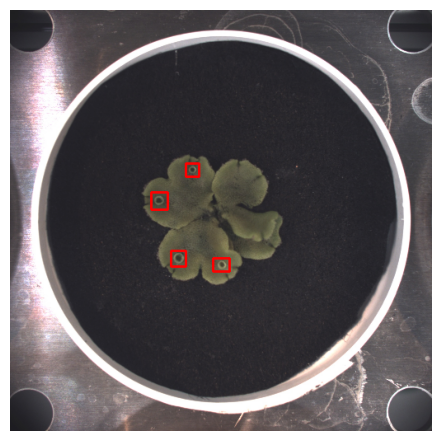

In [27]:
import matplotlib.pyplot as plt

plt.imshow(
    tst_ds.draw_image_with_boxes(filename=train.sample(n=1).filename.to_list()[0])
)
plt.tight_layout()
plt.axis("off")
plt.show()


## Test Transformations/Augmentations

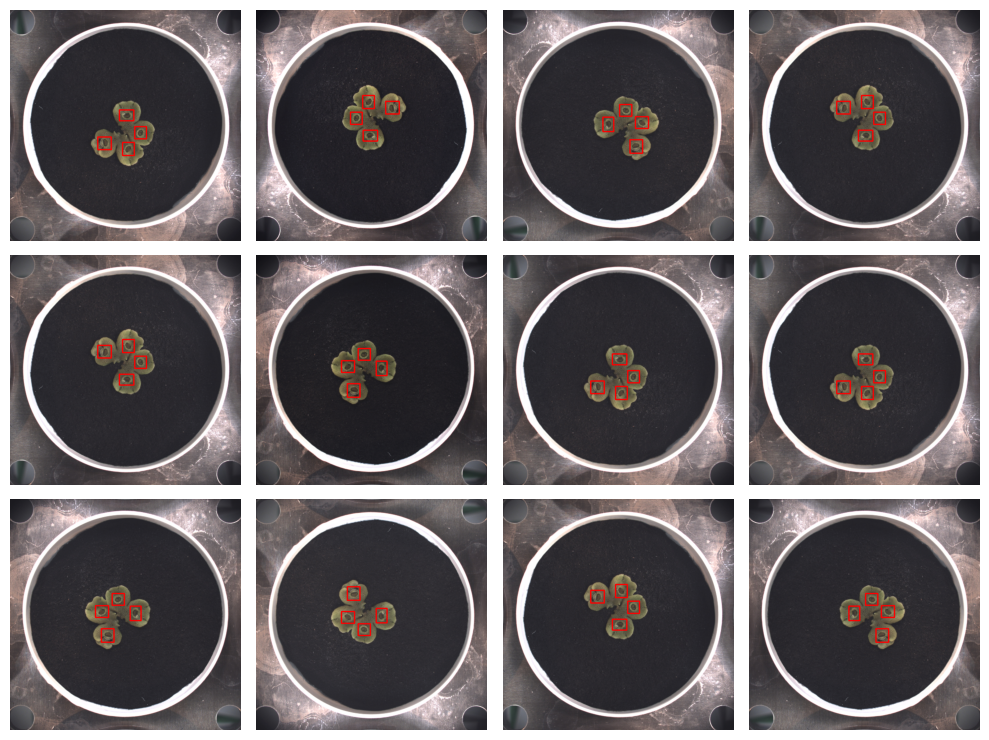

In [11]:
file_name = train.sample(n=1).filename.to_list()[0]

lds.make_patches_grid(
    images=[tst_ds.draw_image_with_boxes(filename=file_name) for _ in range(12)],
    row_count=3,
    col_count=4,
    figsize=(10, 7.5),
)


## Test Tracking

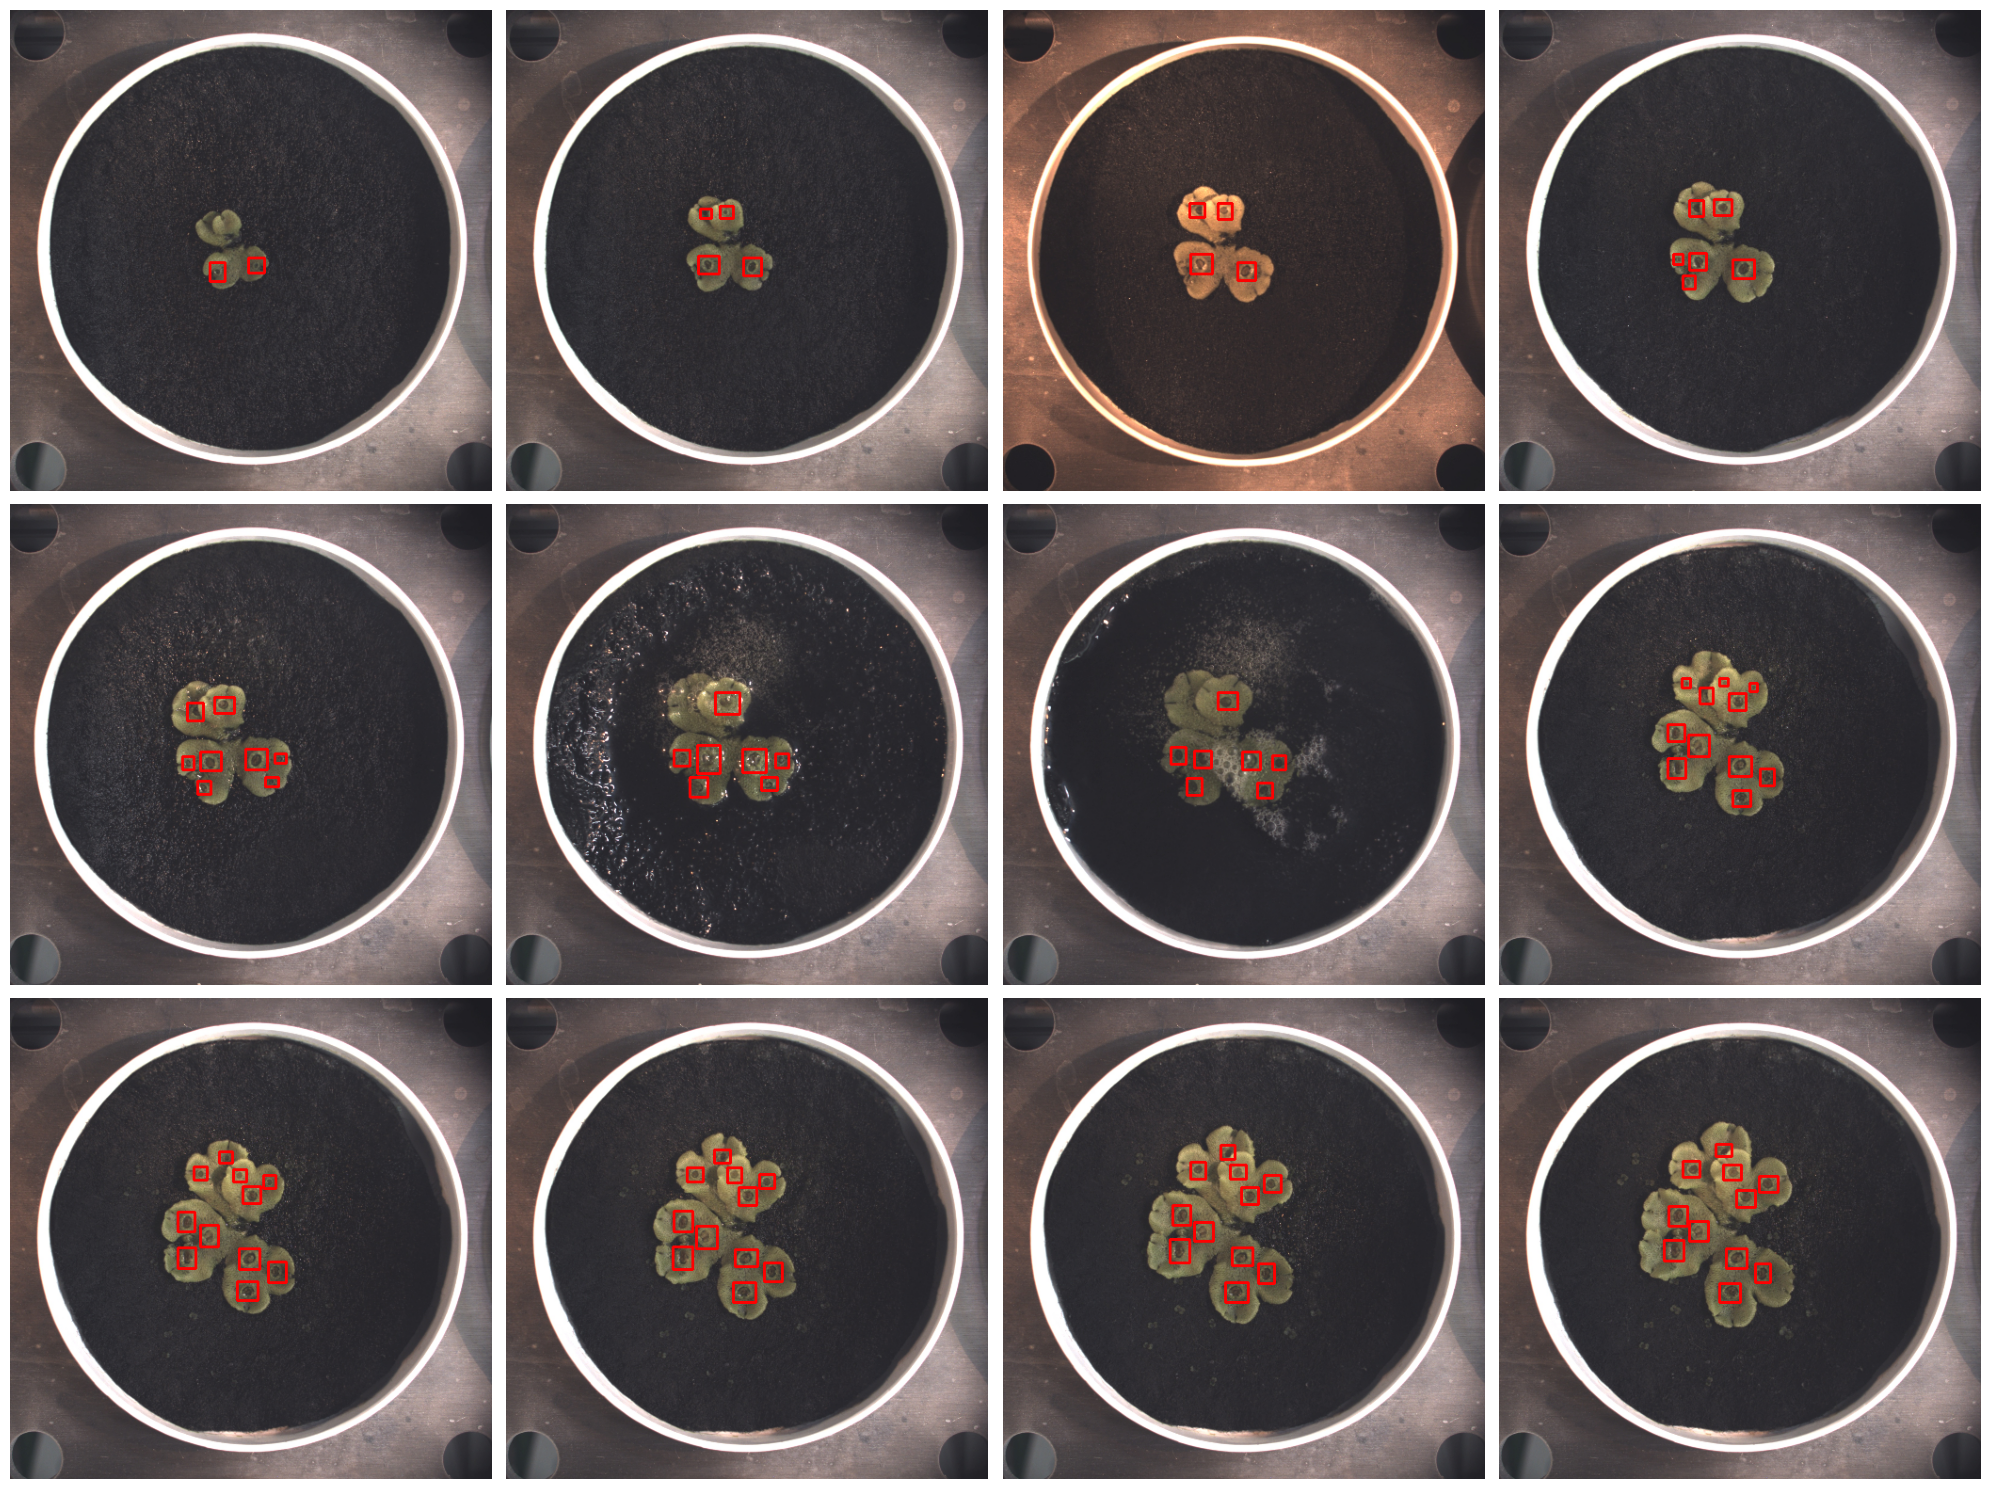

In [45]:
ds_plant = lds.GemmaDataset(
    csv=df_src[df_src.plant == df_src.sample(n=1).plant.to_list()[0]].sort_values(
        ["date_time"]
    ),
    images_path=images_path,
    transform=lds.get_resize_only_image_transform(image_size=image_size),
)

lds.make_patches_grid(
    images=[ds_plant.draw_image_with_boxes(filename=fn) for fn in ds_plant.images],
    row_count=3,
    col_count=4,
    figsize=(20, 15),
)


## Save Datasets

In [43]:
for d, n in zip([train, val, test], ["train", "val", "test"]):
    d.to_csv(str(dataset_path.joinpath(f"{n}.csv")), index=False)